In [138]:
# Brenda Woodard
# Data Science Tools II
# Assignment 7

# Goal: give you the opportunity to implement clustering & logistic regression using your own data
import numpy as np
import pandas as pd
import sklearn
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing as pre 
from sklearn import cluster 
from sklearn import metrics
from sklearn.decomposition import PCA 
from sklearn.model_selection import GridSearchCV
from scipy.cluster.hierarchy import dendrogram
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (OneHotEncoder, LabelEncoder, LabelBinarizer, Binarizer, StandardScaler, 
                                   RobustScaler, MinMaxScaler, MaxAbsScaler)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report 

   Age_0-9  Age_10-19  Age_20-24  Age_25-59  Age_60+  Severity_Mild  \
0        1          0          0          0        0              1   
1        1          0          0          0        0              1   
2        1          0          0          0        0              1   
3        1          0          0          0        0              0   
4        1          0          0          0        0              0   

   Severity_Moderate  Severity_None  Severity_Severe  Gender_Female  
0                  0              0                0              0  
1                  0              0                0              0  
2                  0              0                0              0  
3                  1              0                0              0  
4                  1              0                0              0  
     Age_0-9  Age_10-19  Age_20-24  Age_25-59  Age_60+  Severity_Mild  \
0          1          0          0          0        0              1   
1      

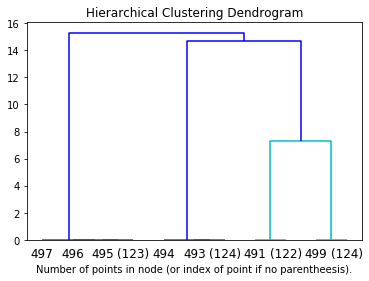

In [110]:
# Question 1

# Find a dataset with at least four variables & at least 100 cases & apply clustering to the dataset
# data source: https://www.kaggle.com/iamhungundji/covid19-symptoms-checker?select=Cleaned-Data.csv
symptoms = pd.read_csv('Cleaned-Data.csv')
# symptoms.head()
# symptoms.columns
symps = symptoms[['Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+', 'Severity_Mild', 
                  'Severity_Moderate', 'Severity_None', 'Severity_Severe', 'Gender_Female']]
print(symps.head())
# symps.isnull().sum()

# Scale the data using an appropriate scaler
X = symps.iloc[0:500,0:9]
print(X)
y = pre.LabelEncoder().fit_transform(X.iloc[:,-1])
print(y)

# Conduct a principal component analysis 
pca = PCA(n_components = 2)
pca = pca.fit(X)
X_pca = pca.transform(X)
X_pca.shape    
    
# Construct a dendrogram using agglomerative clustering to see how many clusters will be optimal to specify in 
# the kmeans clustering.
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0 
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
                # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
                
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
# setting distance_threshold = 0 ensures we compute the full tree.
model = cluster.AgglomerativeClustering(distance_threshold = 0, n_clusters = None)
                                        
model = model.fit(X_pca)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p = 3)
plt.xlabel("Number of points in node (or index of point if no parentheesis).")
plt.show()    

[0 0 0 2 2 2 1 1 1 1 1 1 0 0 0 2 2 2 1 1 1 1 1 1 0 0 0 2 2 2 1 1 1 1 1 1 0
 0 0 2 2 2 1 1 1 1 1 1 0 0 0 2 2 2 1 1 1 1 1 1 0 0 0 2 2 2 1 1 1 1 1 1 0 0
 0 2 2 2 1 1 1 1 1 1 0 0 0 2 2 2 1 1 1 1 1 1 0 0 0 2 2 2 1 1 1 1 1 1 0 0 0
 2 2 2 1 1 1 1 1 1 0 0 0 2 2 2 1 1 1 1 1 1 0 0 0 2 2 2 1 1 1 1 1 1 0 0 0 2
 2 2 1 1 1 1 1 1 0 0 0 2 2 2 1 1 1 1 1 1 0 0 0 2 2 2 1 1 1 1 1 1 0 0 0 2 2
 2 1 1 1 1 1 1 0 0 0 2 2 2 1 1 1 1 1 1 0 0 0 2 2 2 1 1 1 1 1 1 0 0 0 2 2 2
 1 1 1 1 1 1 0 0 0 2 2 2 1 1 1 1 1 1 0 0 0 2 2 2 1 1 1 1 1 1 0 0 0 2 2 2 1
 1 1 1 1 1 0 0 0 2 2 2 1 1 1 1 1 1 0 0 0 2 2 2 1 1 1 1 1 1 0 0 0 2 2 2 1 1
 1 1 1 1 0 0 0 2 2 2 1 1 1 1 1 1 0 0 0 2 2 2 1 1 1 1 1 1 0 0 0 2 2 2 1 1 1
 1 1 1 0 0 0 2 2 2 1 1 1 1 1 1 0 0 0 2 2 2 1 1 1 1 1 1 0 0 0 2 2 2 1 1 1 1
 1 1 0 0 0 2 2 2 1 1 1 1 1 1 0 0 0 2 2 2 1 1 1 1 1 1 0 0 0 2 2 2 1 1 1 1 1
 1 0 0 0 2 2 2 1 1 1 1 1 1 0 0 0 2 2 2 1 1 1 1 1 1 0 0 0 2 2 2 1 1 1 1 1 1
 0 0 0 2 2 2 1 1 1 1 1 1 0 0 0 2 2 2 1 1 1 1 1 1 0 0 0 2 2 2 1 1 1 1 1 1 0
 0 0 2 2 2 1 1 1 1 1 1 0 

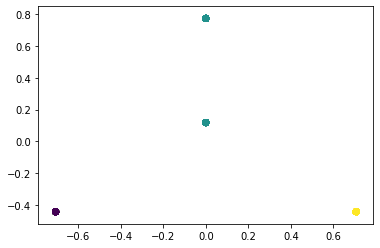

In [111]:
# Implement a kmeans clustering to find the clusters in the data
clu = cluster.KMeans(n_clusters = 3)
clu = clu.fit(X_pca)    
    
# Predict the clusters
y_pred = clu.predict(X_pca)
print(y_pred)
print(y)   
    
# Visualize the clusters
plt.scatter(X_pca[:,0], X_pca[:,1], c = y_pred)

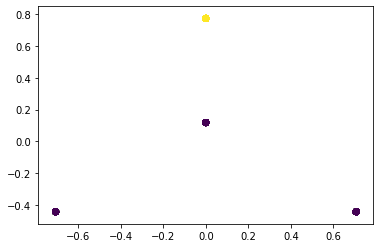

In [112]:
plt.scatter(X_pca[:,0], X_pca[:,1], c = y)

C:\Users\brend\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  
C:\Users\brend\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  
C:\Users\brend\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  
C:\Users\brend\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  
C:\Users\brend\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  


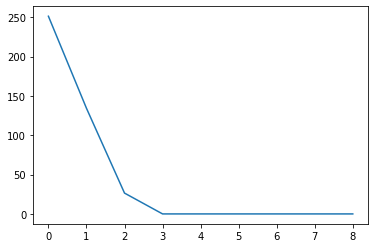

In [113]:
# Also use a loop and a plot to tune the number of clusters. 
n_clusters = list(range(1, 10))
within_cluster_var = []
for i in n_clusters:
    clu = cluster.KMeans(n_clusters = i)
    clu = clu.fit(X_pca)
    within_cluster_var.append(clu.inertia_)
    
plt.plot(within_cluster_var)

# Q: Does the number of clusters obtained parallel the number of clusters obtained using the dendrogram?
# A: Yes it does.

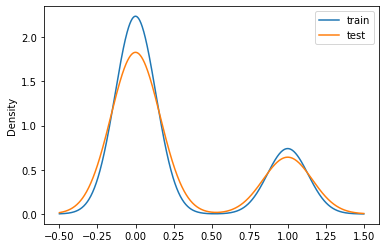

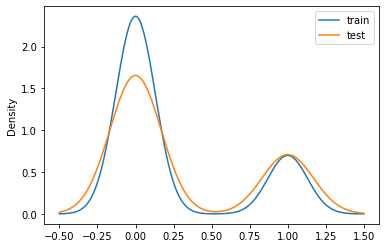

In [114]:
# Add the cluster values to your original dataset to be the labels 
dat = X.copy()
dat['Clusters'] = y_pred
# dat.columns

# Using tools in sklearn, run a logistic regression on the original dataset with new labels to classify cases into the 
# clusters or labels.

# extract the outcome & input variables 
y = y
X = dat[['Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+',
       'Severity_Mild', 'Severity_Moderate', 'Severity_None',
       'Severity_Severe', 'Clusters']]

# randomly split data into train and test datasets
# let the test dataset to be 30% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

# check the size of train dataset
len(X_train), len(y_train)
# check the size of the test dataset
len(X_test), len(y_test)
X_train.head()

# check the shape of "Severity_Mild" X_train & X_test datasets 
X_train["Severity_Mild"].plot(kind=  "kde", label = "train")
X_test["Severity_Mild"].plot(kind = "kde", label = "test")
plt.legend()
plt.show()    

# check the shape of "Severity_Severe" X_train & X_test datasets
X_train["Severity_Severe"].plot(kind = "kde", label = "train")
X_test["Severity_Severe"].plot(kind = "kde", label = "test")
plt.legend()
plt.show()    

X_train: 
 [[ 0.          0.          0.          0.          0.          1.73867435
  -0.58394877 -0.60595998 -0.54433105 -1.41829447]
 [ 0.          0.          0.          0.          0.         -0.57515083
   1.71247898 -0.60595998 -0.54433105  1.40217748]
 [ 0.          0.          0.          0.          0.         -0.57515083
   1.71247898 -0.60595998 -0.54433105  1.40217748]
 [ 0.          0.          0.          0.          0.         -0.57515083
   1.71247898 -0.60595998 -0.54433105  1.40217748]
 [ 0.          0.          0.          0.          0.         -0.57515083
  -0.58394877 -0.60595998  1.83711731 -0.00805849]]
X_test: 
 [[ 0.          0.          0.          0.          0.         -0.59274898
  -0.57221816 -0.48956044  1.52752523  0.018735  ]
 [ 0.          0.          0.          0.          0.         -0.59274898
   1.74758521 -0.48956044 -0.65465367  1.42386026]
 [ 0.          0.          0.          0.          0.         -0.59274898
  -0.57221816  2.04264872 -0.

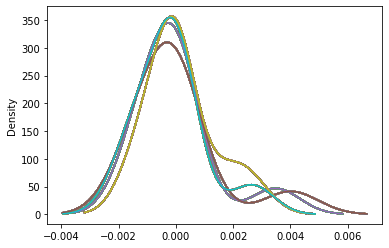

Accuracy: 1.0
Confusion Matrix: 
 [[105   0]
 [  0  45]]


In [115]:
# standardize the input train data
X_train_sc = StandardScaler().fit_transform(X_train)
X_train_sc

# standardize the input test data
X_test_sc = StandardScaler().fit_transform(X_test)

#view just the first 5 rows
print('X_train: \n', X_train_sc[0:5, :])
print('X_test: \n', X_test_sc[0:5, :])

# check the mean of the train data 
print(pd.DataFrame(X_train_sc).agg(["mean", "std"]))
# check the mean of the test data 
print(pd.DataFrame(X_test_sc).agg(["mean", "std"]))

# Tune the cutoff value, c, of the logistic regression constructor in sklearn and plot the error rates and the 
# corresponding settings of c. note that the cutoff c ranges from 0 to 1.
pd.DataFrame(np.linalg.pinv(X_train_sc)).plot(kind = "kde", legend = False)
plt.show()

logmodel = LogisticRegression()
logmodel.fit(X_train_sc, y_train)

# Use the optimal cut off to compute the accuracy of your logistic regression.
accuracy = logmodel.score(X_test_sc, y_test)
print('Accuracy:', accuracy)

predictions = logmodel.predict(X_test_sc)
cm = confusion_matrix(y_test, predictions)
print('Confusion Matrix:','\n', cm)

# Try if you can interpret or describe what the clusters represent based on the pattern of values in the data set and the 
# cluster. Example, if the data was only age and income, maybe clusters one is young and richer, cluster two may be rich 
# seniors and cluster three are poor youths. Your visualization can also help with this interpretation. 

# Q: Do you think the clustering algorithm found good clusters that can be used for classification? 
# A: Yes I do

In [157]:
# Question 2

# A) - Find another dataset that is suitable for logistic regression and run LR on the data using the statsmodel package
CDat = pd.read_csv('current-data-on-the-geographic-distribution-of-covid-19-cases-worldwide.csv')
print(CDat.head())
print(CDat.isnull().sum())
CD = CDat.drop(['day', 'month', 'daterep', 'countriesandterritories', 'geoid', 'countryterritorycode', 'continentexp'], axis=1)
CD = CD.dropna()
print(CD.isnull().sum())
print(CD.shape)

x = CD['deaths'].values
x = x.reshape(-1, 1)
min_max_scaler = pre.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

COV_df = CD[['year', 'cases', 'popdata2018']]
COV_df['death'] = x_scaled
print(COV_df.head())

print(COV_df.isnull().sum())
COV = COV_df.dropna()
print(COV.isnull().sum())
print(COV.shape)
print(COV.head())

formula = "death ~ year + cases + popdata2018"
model = sm.logit(formula = formula, data = COV).fit()
print(model.summary2())

   daterep  day  month  year  cases  deaths countriesandterritories geoid  \
0      NaN   28      4  2020    172       0             Afghanistan    AF   
1      NaN   27      4  2020     68      10             Afghanistan    AF   
2      NaN   26      4  2020    112       4             Afghanistan    AF   
3      NaN   25      4  2020     70       1             Afghanistan    AF   
4      NaN   24      4  2020    105       2             Afghanistan    AF   

  countryterritorycode  popdata2018 continentexp  
0                  AFG   37172386.0         Asia  
1                  AFG   37172386.0         Asia  
2                  AFG   37172386.0         Asia  
3                  AFG   37172386.0         Asia  
4                  AFG   37172386.0         Asia  
daterep                    13623
day                            0
month                          0
year                           0
cases                          0
deaths                         0
countriesandterritories        0


C:\Users\brend\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [166]:
# B) - Print the results & interpret the parameter coefficients for each input variable: 

# logistic regression coefficients 
results = pd.DataFrame(model.params, columns = ["coef"])
results["exp_coef"] = np.exp(model.params)
print(results)

coef = model.params
print(coef)
np.exp(coef)

                     coef  exp_coef
Intercept    3.425341e+03       inf
year        -1.698805e+00  0.182902
cases        2.018644e-04  1.000202
popdata2018  5.757476e-10  1.000000
Intercept      3.425341e+03
year          -1.698805e+00
cases          2.018644e-04
popdata2018    5.757476e-10
dtype: float64


C:\Users\brend\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Intercept           inf
year           0.182902
cases          1.000202
popdata2018    1.000000
dtype: float64

C) - Evaluate the model

The coefficients of the logistic regression model can be interpreted as follows:
   
   
    -The year coefficient is -1.698805e+00, meaning that if every other factor is held constant and the year 
    is increased by 1, the log odd would increase by -1.698805e+00, and therefore the odds of dying from COVID would
    increase by exp(-1.698805e+00) = 0.182902


    -If cases increases by 1 unit, the odds of dying would increase by 2.018644e-04


    -If the popdata2018 increases by 1, the odds of dying would increase by 5.757476e-10